In [85]:
#!pip install xarray
!sudo /bin/bash -c "(source /venv/bin/activate; pip install xarray)"

In [86]:
!sudo /bin/bash -c "(source /venv/bin/activate; pip install yapf)"

In [87]:
import numpy as np

print("numpy version=", np.__version__)
import xarray as xr

print("xarray version=", xr.__version__)

numpy version= 1.26.0
xarray version= 2024.2.0


In [88]:
from IPython.display import HTML, display

display(HTML("<style>.container { width:77% !important; }</style>"))

# Overview: why xarray?

- `xarray` adds labels (e.g., dimensions, coordinates, attributes) to `numpy` N-dim arrays (aka tensors)

- `xarray` allows to:
    - apply operations over dimensions by name
    - use dimension names (e.g., `dim='time'` vs `axis=0`)
    - select values by label (instead of integer location)
    - vectorizes
    - split-apply-combine paradigm
    - write less code
    - label-based operations frees users to know how the data is organized

- `DataArray` is labeled N-dimensional array
    - generalizes `pd.Series` to N dimensions
    - attaches labels to `np.ndarray`

- `Dataset` is dict-like container of `DataArray`
    - arrays in `Dataset` can have different number of dimensions

- `xarray` integrates with the Pydata ecosystem (`numpy`, `pandas`, `Dask`, `matplotlib`)
    - It's easy to get data in and out

# Quick overview

From https://docs.xarray.dev/en/stable/getting-started-guide/quick-overview.html

## Create DataArray

In [89]:
np.random.seed(314)
data = xr.DataArray(
    # - Create a 2D array.
    # np.random.rand(2, 3),
    [[1, 2, 3], [4, 5, 6]],
    # - Assign x and y to the dimensions.
    dims=("x", "y"),
    # - Assign coordinate labels 10 and 20 to locations along x dimension.
    coords={"x": [10, 20]},
)
data

# x has 2 dimensions "x", "y"
# the x dimensions has coordinates/names

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[1, 2, 3],
       [4, 5, 6]])
Coordinates:
  * x        (x) int64 16B 10 20
Dimensions without coordinates: y

In [90]:
print(type(data))

<class 'xarray.core.dataarray.DataArray'>


In [91]:
print(data)

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[1, 2, 3],
       [4, 5, 6]])
Coordinates:
  * x        (x) int64 16B 10 20
Dimensions without coordinates: y


In [92]:
# Extract the numpy data structure.
vals = data.values
print(type(vals))
print(vals)

<class 'numpy.ndarray'>
[[1 2 3]
 [4 5 6]]


In [93]:
# Extract the dimension names which are a tuple.
print(type(data.dims))
print(data.dims)

<class 'tuple'>
('x', 'y')


In [94]:
# Extract the coordinates.
print(type(data.coords))
print(data.coords)

<class 'xarray.core.coordinates.DataArrayCoordinates'>
Coordinates:
  * x        (x) int64 16B 10 20


In [95]:
# Extract the attributes.
data.attrs

{}

### Indexing

In [96]:
data

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[1, 2, 3],
       [4, 5, 6]])
Coordinates:
  * x        (x) int64 16B 10 20
Dimensions without coordinates: y

- Slicing an xarray returns another xarray with the slice

In [97]:
# Set the x dimension to be 0 (like numpy), so get the first row.
data[0, :]

<xarray.DataArray (y: 3)> Size: 24B
array([1, 2, 3])
Coordinates:
    x        int64 8B 10
Dimensions without coordinates: y

In [98]:
# Set the x dimension to be 1 (like numpy), so get the second row.
data[1, :]

<xarray.DataArray (y: 3)> Size: 24B
array([4, 5, 6])
Coordinates:
    x        int64 8B 20
Dimensions without coordinates: y

In [99]:
# loc, "location": select by coordinate label (like pandas)
# Get data along the first dimension for the index called `10`.
data.loc[10]

<xarray.DataArray (y: 3)> Size: 24B
array([1, 2, 3])
Coordinates:
    x        int64 8B 10
Dimensions without coordinates: y

In [100]:
# isel, "integer select": select by dimension name and integer label
# Get data along the dimension `x` for the first index
data.isel(x=0)

<xarray.DataArray (y: 3)> Size: 24B
array([1, 2, 3])
Coordinates:
    x        int64 8B 10
Dimensions without coordinates: y

In [101]:
# isel, "integer select": select by dimension name and integer label
# Get data along the dimension `y` for the second index
data.isel(y=1)

<xarray.DataArray (x: 2)> Size: 16B
array([2, 5])
Coordinates:
  * x        (x) int64 16B 10 20

In [102]:
# sel, "select", by dimension name and coordinate label
# Get data along the dimension `x` and the index `10`
data.sel(x=10)

<xarray.DataArray (y: 3)> Size: 24B
array([1, 2, 3])
Coordinates:
    x        int64 8B 10
Dimensions without coordinates: y

### Attributes

- You can add metadata attributes to `DataArray` or to coordinates
- They are used automatically in the plots

In [103]:
data.attrs["long_name"] = "random_velocity"
data.attrs["units"] = "m/s"
data.attrs["description"] = "A random var created as an example"

print(data.attrs)

{'long_name': 'random_velocity', 'units': 'm/s', 'description': 'A random var created as an example'}


In [104]:
data

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[1, 2, 3],
       [4, 5, 6]])
Coordinates:
  * x        (x) int64 16B 10 20
Dimensions without coordinates: y
Attributes:
    long_name:    random_velocity
    units:        m/s
    description:  A random var created as an example

In [105]:
data.x.attrs["units"] = "x units"

In [106]:
data

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[1, 2, 3],
       [4, 5, 6]])
Coordinates:
  * x        (x) int64 16B 10 20
Dimensions without coordinates: y
Attributes:
    long_name:    random_velocity
    units:        m/s
    description:  A random var created as an example

### Computation

In [107]:
data + 10

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[11, 12, 13],
       [14, 15, 16]])
Coordinates:
  * x        (x) int64 16B 10 20
Dimensions without coordinates: y

In [108]:
data.sum()

<xarray.DataArray ()> Size: 8B
array(21)

In [109]:
# Compute mean over one dimension by label.
data.mean(dim="x")

<xarray.DataArray (y: 3)> Size: 24B
array([2.5, 3.5, 4.5])
Dimensions without coordinates: y

In [121]:
# Transposition.
data.T

<xarray.DataArray (y: 3, x: 2)> Size: 48B
array([[1, 4],
       [2, 5],
       [3, 6]])
Coordinates:
  * x        (x) int64 16B 10 20
Dimensions without coordinates: y
Attributes:
    long_name:    random_velocity
    units:        m/s
    description:  A random var created as an example

In [133]:
np.random.seed(314)
# Create a 1-vector with coordinates.
a = xr.DataArray(np.random.randn(3), {"y": [0, 1, 2]})
display(a)
# Create a 1-vector with dimension.
b = xr.DataArray(np.random.randn(4), dims="z")
display(b)

<xarray.DataArray (y: 3)> Size: 24B
array([0.16608544, 0.78196448, 0.85228509])
Coordinates:
  * y        (y) int64 24B 0 1 2

<xarray.DataArray (z: 4)> Size: 32B
array([-0.70707096, -0.93165719,  0.88666088, -0.22178966])
Dimensions without coordinates: z

In [127]:
# No need for
a + b

<xarray.DataArray (y: 3, z: 4)> Size: 96B
array([[-0.54098552, -0.76557175,  1.05274632, -0.05570422],
       [ 0.07489352, -0.14969271,  1.66862536,  0.56017482],
       [ 0.14521413, -0.0793721 ,  1.73894597,  0.63049544]])
Coordinates:
  * y        (y) int64 24B 0 1 2
Dimensions without coordinates: z

In [135]:
np.random.seed(314)
# Create a 1-vector with coordinates.
a = xr.DataArray(np.random.randn(3), {"z": [0, 1, 2]})
# Create a 1-vector with dimension.
b = xr.DataArray(np.random.randn(3), dims="z")

a + b

<xarray.DataArray (z: 3)> Size: 24B
array([-0.54098552, -0.14969271,  1.73894597])
Coordinates:
  * z        (z) int64 24B 0 1 2

### Pandas interaction

In [111]:
# From xarray to multi-index pd.Series.
srs = data.to_series()
srs

x   y
10  0    1
    1    2
    2    3
20  0    4
    1    5
    2    6
dtype: int64

In [112]:
# From pd.Series to xarray.
srs.to_xarray()

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[1, 2, 3],
       [4, 5, 6]])
Coordinates:
  * x        (x) int64 16B 10 20
  * y        (y) int64 24B 0 1 2

In [120]:
df = data.to_dataframe(name="hello")
df

hello
x  y       
10 0      1
   1      2
   2      3
20 0      4
   1      5
   2      6

### Plotting

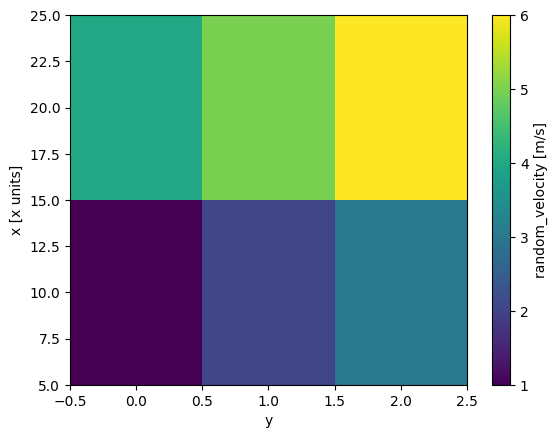

In [110]:
# The plot uses the attributes.
data.plot()

## Datasets

- Variables in a `Dataset` can have different dimensions and dtypes
- If two variables have the same dimension (e.g., `x`) the dimension must be identical in both variables

In [113]:
# Create a dictionary with heterogeneous data.
dict_ = dict(foo=data, bar=("x", [1, 2]), baz=np.pi)
print(dict_)

{'foo': <xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[1, 2, 3],
       [4, 5, 6]])
Coordinates:
  * x        (x) int64 16B 10 20
Dimensions without coordinates: y
Attributes:
    long_name:    random_velocity
    units:        m/s
    description:  A random var created as an example, 'bar': ('x', [1, 2]), 'baz': 3.141592653589793}


In [114]:
# Create a dataset from the dict.
# - foo is a DataArray (with 2 dimensions)
# - bar is a one-dimensional
# - baz is a scalar (with no dimensions)
ds = xr.Dataset(dict_)
ds

<xarray.Dataset> Size: 88B
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) int64 16B 10 20
Dimensions without coordinates: y
Data variables:
    foo      (x, y) int64 48B 1 2 3 4 5 6
    bar      (x) int64 16B 1 2
    baz      float64 8B 3.142

In [115]:
# Extract one variable from the dataset.
ds["foo"]
# Equivalent to:
# ds.foo

<xarray.DataArray 'foo' (x: 2, y: 3)> Size: 48B
array([[1, 2, 3],
       [4, 5, 6]])
Coordinates:
  * x        (x) int64 16B 10 20
Dimensions without coordinates: y
Attributes:
    long_name:    random_velocity
    units:        m/s
    description:  A random var created as an example

In [116]:
# Both `foo` and `bar` variables have the same coordinate `x`.
# So we can use `x` to slice the data.
ds["x"]
# ds.bar["x"]
# ds.foo["x"]

<xarray.DataArray 'x' (x: 2)> Size: 16B
array([10, 20])
Coordinates:
  * x        (x) int64 16B 10 20
Attributes:
    units:    x units